<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
        <span><br><font size=3></font></span>
        <span><br><font size=3></font></span>
        <span><br><font size=6>Sepehr Karimi Arpanahi</font></span>
        <span><br><font size=3>810100447</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mersad.esalati@gmail.com">Mersad Esalati</a><br></font><br>
    </div>
</div>

# Selenium

## Weather Info Crawler
Daily Weather Information:
- Temperature (°F) - only Avg metric
- Dew Point (°F) - only Avg metric
- Humidity (%) - only Avg metric
- Wind Speed (mph) - only Avg metric
- Pressure (in) - only Avg metric
- Precipitation (in) - only Avg metric
- date

<div dir = "rtl">
در بخش دوم از تمرین می خواهیم اطلاعات آب و هوایی را از سایت داده شده
crawl
کنیم. برای این کار ابتدا کتابخانه 
selenium
و ماژول های مورد نیازمان را 
import
می کنیم. سپس درایور گوگل کروم را دانلود کرده و 
driver
آن را اجرا می کنیم.
در ادامه لینک مربوط به اب و هوای ماه اول از سال ۲۰۲۱ که در سوال داده شده است را 
get
می کنیم.
سپس در یک حلقه ۱۲ تایی (به تعداد هر ماه)، گزارش های ماهیانه را بر روی جدول ها 
crawl
 کرده و در یک دیکشنری ذخیره می کنیم.

 پس از ذخیره سازی داده ها، آن ها را در یک فایل 
 csv
 ذخیره می کنیم. و index  را برابر false  قرار می دهیم تا فقط ستون های خواسته شده در جدول ذخیره شود.
 در انتهای ذخیره سازی اطلاعات هر ماه،
 crawler
 بر روی 
 monthSelector
 کلیک کرده و ماه بعدی را انتخاب می کند. پس از آن بر روی view می زند تا صفحه جدید لود شود.
این کار را در یک حلقه به ازای هر ماه تکرار کرده و فایل اطلاعات هر ماه را در پوشه
Washington_weather
ذخیره کردیم و عدد آخر نام هر کدام از فایل ها نمایانگر اطلاعات آن ماه می باشد.
</div>

In [118]:
# crawl data + save into csv files

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from tqdm import tqdm
import pandas as pd

''' Change this according to your browser'''
driver = webdriver.Chrome(executable_path='/Users/carltonj.lloyd/Documents/Private/Msc@tehran/Term3/IL/chromedriver')


url = 'https://www.wunderground.com/history/monthly/us/va/arlington/KDCA/date/2021-01'
driver.get(url)
#driver.maximize_window()

time.sleep(25)


for page in tqdm(range(12)):
    
    data = {
    #'dt': [],
    'Temperature': [],
    'Dew Point': [],
    'Humdity': [],
    'Wind Speed': [],
    'Pressure': [],
    'Precipitation': [],
    'date': [],
    }
    
    row =  driver.find_element(By.XPATH, '//*[@id="inner-content"]/div[2]/div[1]/div[5]/div[1]/div/lib-city-history-observation/div/div[2]/table/tbody/tr')
        
    date_data = [e.text for e in row.find_elements(By.XPATH,"//td[1]//table//tr//td[1]")]
    avg_temp_data = [e.text for e in row.find_elements(By.XPATH,"//td[2]//table//tr//td[2]")]
    avg_DewPoint_data = [e.text for e in row.find_elements(By.XPATH,"//td[3]//table//tr//td[2]")]
    avg_humidity_data = [e.text for e in row.find_elements(By.XPATH,"//td[4]//table//tr//td[2]")]
    avg_windspeed_data = [e.text for e in row.find_elements(By.XPATH,"//td[5]//table//tr//td[2]")]
    avg_Pressure_data = [e.text for e in row.find_elements(By.XPATH,"//td[6]//table//tr//td[2]")]
    avg_Precipitation_data = [e.text for e in row.find_elements(By.XPATH,"//td[7]//table//tr//td[1]")]
    
    if (date_data[-1] == '1'):
        avg_temp_data = avg_temp_data[:-1]
        avg_DewPoint_data = avg_DewPoint_data[:-1]
        avg_humidity_data = avg_humidity_data[:-1]
        avg_windspeed_data = avg_windspeed_data[:-1]
        avg_Pressure_data = avg_Pressure_data[:-1]
        avg_Precipitation_data = avg_Precipitation_data[:-1]
        date_data = date_data[:-1]

    data['Temperature'] = (avg_temp_data[1:])
    data['Dew Point'] = (avg_DewPoint_data[1:])
    data['Humdity'] = (avg_humidity_data[1:])
    data['Wind Speed'] = (avg_windspeed_data[1:])
    data['Pressure'] = (avg_Pressure_data[1:])
    data['Precipitation'] = (avg_Precipitation_data[1:])
    
    date1 = '2021-'+str(page+1) + '-1'
    date2 = '2021-' +str(page+1) + '-'+str(date_data[-1])
    mydates = pd.date_range(date1, date2).tolist()
    data['date'] = mydates

    df = pd.DataFrame.from_dict(data)
    df.to_csv('Washington_weather/Washington_weather_2021_' + str(page+1) + '.csv',index=False)
    
    if page < 11:

        month = page+ 2
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,"//select/option[@value='{}']".format(month))))
        next_btn = driver.find_element(By.XPATH,"//select/option[@value='{}']".format(month))
        next_btn.click()
        next_btn = driver.find_element( By.XPATH, '//*[@id="dateSubmit"]' ).click()

        time.sleep(40)

# Close 
driver.close()



/var/folders/x5/q0fc0n595f5773vxgz9_5lj00000gn/T/ipykernel_72587/3850679318.py:14: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='/Users/carltonj.lloyd/Documents/Private/Msc@tehran/Term3/IL/chromedriver')
100%|██████████| 12/12 [09:17<00:00, 46.44s/it]


## Download Capitalbikeshare Data
You can write script for download and extracting files or do it manualy.

<div dir = "rtl">
در این قسمت اطلاعات مربوط به دوچرخه های اشتراکی شهر 
Washington
در سال ۲۰۲۱ را از سایت دانلود کرده و در پوشه
capitalbikeshare
ذخیره کرده ایم.
</div>

## Question 1: Merge Weather Info Dataframes

<div dir = "rtl">
همانطور که در سوال امده، در این قسمت تمام فایل های اطلاعات آب و هوایی هر ماه را با هم ادغام می کنیم.
در اینجا پس از خواندن فایل ها، آن ها را بر اساس تاریخ مرتب می کنیم.
همانطور که می بینیم، این دیتافریم دارای ۷ ستون و ۳۶۵ ردیف است.
</div>

In [2]:
# Import libraries
import glob
import pandas as pd

# Get CSV files list from a folder
path = './Washington_weather'
df_Washington_weather = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv"))).sort_values('date',ascending=True).reset_index(drop=True)
df_Washington_weather['date'] = pd.to_datetime(df_Washington_weather['date'])
display( df_Washington_weather )

,Temperature,Dew Point,Humdity,Wind Speed,Pressure,Precipitation,date
0,37.4,32.2,82.6,7.8,30.3,0.00,2021-01-01
1,43.8,38.5,83.4,7.0,30.0,0.81,2021-01-02
2,40.5,37.4,89.1,7.8,30.0,0.19,2021-01-03
3,40.4,34.3,79.9,5.9,30.0,0.09,2021-01-04
4,40.9,35.2,80.5,6.9,29.9,0.00,2021-01-05
...,...,...,...,...,...,...,...
360,41.3,31.0,67.0,6.5,30.0,0.00,2021-12-27
361,48.2,32.8,59.2,4.5,29.9,0.00,2021-12-28
362,50.2,40.5,70.1,5.0,29.8,0.00,2021-12-29
363,50.6,47.8,90.0,4.3,29.9,0.26,2021-12-30


## Question 2: Merge Capitalbikeshare Dataframes

<div dir = "rtl">
در این قسمت جداول دانلود شده مربوط به دوچرخه هار اشتراکی که در پوشه
capitalbikeshare
وجود دارند را با یکدیگر اذغام کرده و در
df_CapitalBikeshare
ذخیره می کنیم.
</div>

In [3]:
# Import libraries
import glob
import pandas as pd

# Get CSV files list from a folder
path = './capitalbikeshare'
df_CapitalBikeshare = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")      ))
display( df_CapitalBikeshare.head() )

/var/folders/x5/q0fc0n595f5773vxgz9_5lj00000gn/T/ipykernel_75414/2237566663.py:7: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_CapitalBikeshare = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")      ))


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EF1237396C1D2DF4,electric_bike,2021-11-15 09:40:42,2021-11-15 09:48:22,Rhode Island & Connecticut Ave NW,31239.0,Potomac & M St NW,31295.0,38.905874,-77.039957,38.905309,-77.065044,member
1,4CA89455176FD912,classic_bike,2021-11-23 16:57:30,2021-11-23 17:02:04,Rhode Island & Connecticut Ave NW,31239.0,18th & R St NW,31278.0,38.905996,-77.039802,38.912648,-77.041834,member
2,3E632C5C54A1485C,classic_bike,2021-11-29 09:27:35,2021-11-29 09:51:22,12th & Irving St NE,31511.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.928644,-76.990955,38.884095,-76.995234,member
3,9ED25F0388AC6226,classic_bike,2021-11-09 17:47:01,2021-11-09 17:51:15,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member
4,3BF46E8C8FB64B36,classic_bike,2021-11-04 16:17:13,2021-11-04 16:21:01,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member


## Question 3: Data Cleaning

<div dir = "rtl">
الف:

در این قسمت به تمیز سازی داده ها می پردازیم.

در بخش اول تمامی سطر هایی که حداقل یک مقدار 
NaN
دارند را حذف می کنیم و سپس ایندکس را 
reset
 می کنیم. همانطور که میبینیم در این مرحله تعداد سطر ها به ۲۴۵۴۵۰۳  کاهش پیدا کرده است.
</div>

In [5]:
#a
df_CapitalBikeshare2 = df_CapitalBikeshare.copy()
df_CapitalBikeshare2=df_CapitalBikeshare2.dropna().reset_index(drop=True)
display ( df_CapitalBikeshare2.shape )

(2454503, 13)

<div dir = "rtl">
ب:


در قسمت دوم از این سوال می خواهیم ردیف هایی که اطلاعات تاریخ نامناسب دارند را حذف کنیم. برای این کار ابتدا ستون های
started_at
و
ended_at
را به فرمت
datetime
در می اوریم سپس هر سطری که یک داده Nat داشته باشد را حذف می کنیم
</div>

In [6]:
#b

# convert Columns to DateTime Format
df_CapitalBikeshare2['started_at'] = pd.to_datetime(df_CapitalBikeshare2['started_at'])
df_CapitalBikeshare2['ended_at'] = pd.to_datetime(df_CapitalBikeshare2['ended_at'])

not_paid = df_CapitalBikeshare2[df_CapitalBikeshare2['ended_at'].isna()]


<div dir = "rtl">

ج:
در این قسمت، یک ستون جدید به نام
difference
می سازیم که فرمت آن 
TimeDelta
و شوه محاسبه آن از کم کردن مقدار تاریخ شروع سفر از تاریخ پایان سفر می باشد یعنی:
'Difference' = 'ended_at' - 'started_at'

پس از اضافه کردن این ستون، هر کدام از سطر که شرط
df_CapitalBikeshare3['Difference'] < pd.Timedelta(1, unit='d')
را نداشته باشد را از دیتافریم حذف می کنیم.

</div>

In [7]:
# delete all rows with diffenece longer than one day



df_CapitalBikeshare3 = df_CapitalBikeshare2.copy()

df_CapitalBikeshare3.insert (loc=4,column = 'Difference' , value= df_CapitalBikeshare3['ended_at'].sub(df_CapitalBikeshare3['started_at'], axis=0)     )


df_CapitalBikeshare3 = df_CapitalBikeshare3[ df_CapitalBikeshare3['Difference'] < pd.Timedelta(1, unit='d')  ]
print(df_CapitalBikeshare3.shape)
#df3.drop(indexAge , inplace=True)

(2453310, 14)


## Question 4: Join Dataframes

<div dir = "rtl">

در این قسمت می خواهیم دو دیتافریم را با هم ادغام کنیم. برای این کار ابتدا در دیتافریم
df_CapitalBikeshare3
یک ستون جدید می سازیم که در آن فقط تاریخ(بدون ساعت) ستون
started_at
وجود داشته باشد.
سپس دو دیتافریم را بر اساس ستون date , و به صورت داخلی، merge می کنیم.
و داده ها را در 
joined_date 
ذخیره می کنیم.

</div>

In [8]:
df_CapitalBikeshare3['date'] = df_CapitalBikeshare3['started_at'].dt.normalize()
joined_data = pd.merge(df_CapitalBikeshare3,df_Washington_weather,how='inner',on = 'date')
display ( joined_data )

,ride_id,rideable_type,started_at,ended_at,Difference,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,end_lat,end_lng,member_casual,date,Temperature,Dew Point,Humdity,Wind Speed,Pressure,Precipitation
0,EF1237396C1D2DF4,electric_bike,2021-11-15 09:40:42,2021-11-15 09:48:22,0 days 00:07:40,Rhode Island & Connecticut Ave NW,31239.0,Potomac & M St NW,31295.0,38.905874,...,38.905309,-77.065044,member,2021-11-15,45.6,26.3,47.5,10.8,30.0,0.0
1,96F63A66AB6784DD,classic_bike,2021-11-15 09:50:15,2021-11-15 09:56:10,0 days 00:05:55,Rhode Island & Connecticut Ave NW,31239.0,23rd & M St NW,31128.0,38.905996,...,38.905303,-77.050264,member,2021-11-15,45.6,26.3,47.5,10.8,30.0,0.0
2,201F2A8EAF6DB907,classic_bike,2021-11-15 08:53:12,2021-11-15 09:05:17,0 days 00:12:05,7th & F St NW / National Portrait Gallery,31232.0,White House,31329.0,38.897283,...,38.895509,-77.037925,member,2021-11-15,45.6,26.3,47.5,10.8,30.0,0.0
3,65C12885D30B6756,classic_bike,2021-11-15 16:39:19,2021-11-15 16:48:30,0 days 00:09:11,4th & M St SE,31652.0,Columbus Circle / Union Station,31623.0,38.876751,...,38.896960,-77.004930,member,2021-11-15,45.6,26.3,47.5,10.8,30.0,0.0
4,D46CDA6721C73AA1,classic_bike,2021-11-15 17:20:51,2021-11-15 17:37:08,0 days 00:16:17,4th St & G St SW,31666.0,Columbus Circle / Union Station,31623.0,38.881123,...,38.896960,-77.004930,member,2021-11-15,45.6,26.3,47.5,10.8,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453305,2A7D79A0932C78E6,classic_bike,2021-12-29 14:43:20,2021-12-29 14:57:09,0 days 00:13:49,Jefferson Dr & 14th St SW,31247.0,15th St & Pennsylvania Ave NW,31129.0,38.888553,...,38.896465,-77.033381,casual,2021-12-29,50.2,40.5,70.1,5.0,29.8,0.0
2453306,A93D3B5FCFB8DC62,electric_bike,2021-12-29 17:32:01,2021-12-29 17:54:13,0 days 00:22:12,Westpark & Park Run Dr,32207.0,Tysons Corner Station,32204.0,38.928950,...,38.920939,-77.222115,member,2021-12-29,50.2,40.5,70.1,5.0,29.8,0.0
2453307,B6AB5175E1B23677,classic_bike,2021-12-29 18:26:29,2021-12-29 18:37:34,0 days 00:11:05,New Hampshire Ave & T St NW,31229.0,Virginia Ave & 25th St NW,31297.0,38.915544,...,38.899500,-77.054155,member,2021-12-29,50.2,40.5,70.1,5.0,29.8,0.0
2453308,F1B2157C8B710EB3,docked_bike,2021-12-29 15:22:58,2021-12-29 15:44:55,0 days 00:21:57,7th & F St NW / National Portrait Gallery,31232.0,15th St & Pennsylvania Ave NW,31129.0,38.897283,...,38.896465,-77.033381,casual,2021-12-29,50.2,40.5,70.1,5.0,29.8,0.0


## Question 5: Histograms

### Humidity

<div dir = "rtl">
 در این قسمت هیستوگرام مربوط به رطوبت را رسم می کنیم.
</div>

<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:xlabel='count', ylabel='Humidity'>>

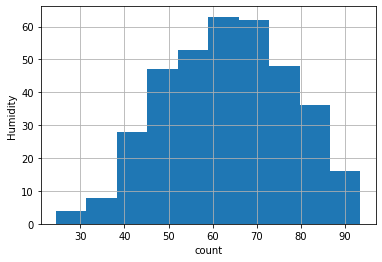

In [9]:
ax = pd.Series.hist(df_Washington_weather['Humdity'])
ax.set_xlabel("count")
ax.set_ylabel("Humidity")
ax.set


### Temperature

<div dir = "rtl">
 در این قسمت هیستوگرام مربوط به دما را رسم می کنیم.
</div>

<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:xlabel='count', ylabel='Temperature'>>

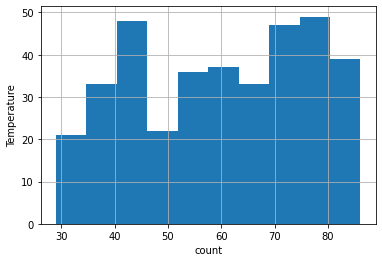

In [10]:
from cProfile import label
from turtle import title


ax = pd.Series.hist(df_Washington_weather["Temperature"])
ax.set_xlabel("count")
ax.set_ylabel("Temperature")
ax.set


## Question 6: Line Plot

<div dir="rtl">
در سوال پنجم می خواهیم نمودار trend تغییرات دما و تغییرات تعداد سفر های انجام شده را در یک نمودار رسم کنیم.
از آنجایی که میدانیم order تغییرات دما و تغییرات تعداد سفر ها در روز بسیار متفاوت است. پس ابتدا هر دو مقدار را باید بین ۰ و ۱ نرمالایز کنیم و سپس آن ها را نمایش دهیم.

پس در ابتدا مانند نمودار ترند سوال اول، ستون های تاریخ هر دو دیتافریم را به فرمت استاندارد تاریخ تبدیل می کنیم.
 سپس دیتافریم
df_CapitalBikeshare
را بر اساس ستون
started_at
گروهبندی کرده و در 
CapitalBikeshar_trend
ذخیره می کنیم. سپس تمام داده های 
CapitalBikeshar_trend
را نرمالایز می کنیم.
همینطور ستون مربوط به مقدار آب و هوای 
df_Washington_weather
را نرمالایز کرده و در انتها هر دو خط ترند را در کنار هم نمایش می دهیم

همانطور که در شکل زیر مشخص است،هر دو نمودار تقریبا از یک شیب پیروی می کنند.

</div>

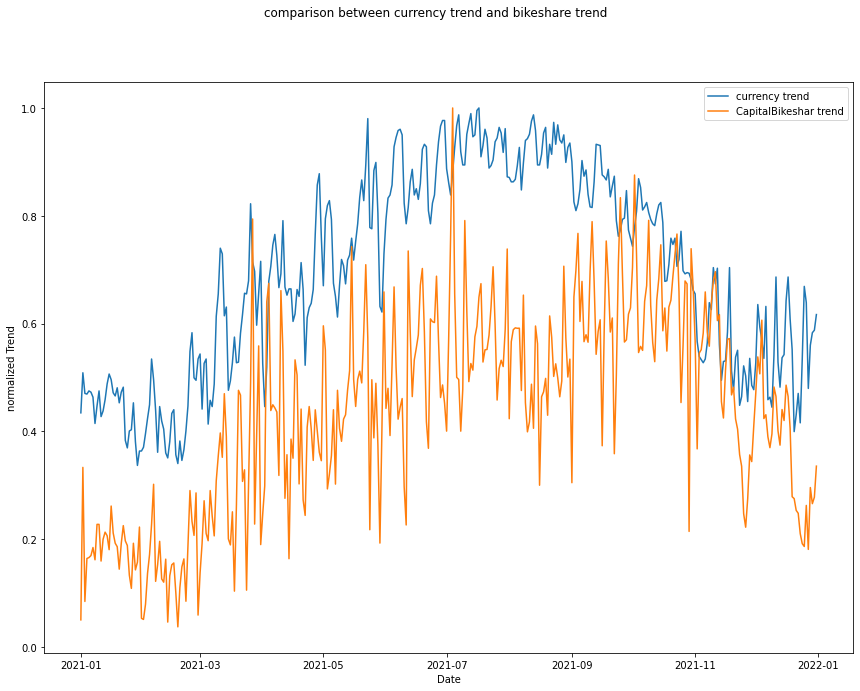

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing


df_Washington_weather['date'] = pd.to_datetime(df_Washington_weather['date'])
df_CapitalBikeshare3['started_at'] = pd.to_datetime(df_CapitalBikeshare3['started_at'])

CapitalBikeshar_trend = df_CapitalBikeshare3.groupby([df_CapitalBikeshare3["started_at"].dt.date])['ride_id'].count()
CapitalBikeshar_trend = CapitalBikeshar_trend  / CapitalBikeshar_trend.abs().max()

df_Washington_weather['Temperature'] = df_Washington_weather['Temperature']  / df_Washington_weather['Temperature'].abs().max()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14.5, 10.5)
ax.plot(df_Washington_weather["date"].dt.date, df_Washington_weather['Temperature'].values, label = "currency trend")
ax.plot(CapitalBikeshar_trend.index, CapitalBikeshar_trend.values, label = "CapitalBikeshar trend")
fig.suptitle('comparison between currency trend and bikeshare trend')
plt.xlabel('Date')
plt.ylabel('normalized Trend')
ax.legend()
